In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [17]:
df = pd.read_csv("D:\\git\\KJeq\\A1_2103_all_filtered.csv", sep=',', header=0, skip_blank_lines=True)

In [3]:
df.head()

,Unnamed: 0,P500_time,P500_signal,P1000_time,P1000_signal,T500_time,T500_signal,T1000_time,T1000_signal
0,1,03/01/2021 00:00:09,6349.79,03/01/2021 00:00:09,9817.43,03/01/2021 00:00:09,27.4157,03/01/2021 00:00:09,40.5588
1,2,03/01/2021 00:00:14,6349.78,03/01/2021 00:00:14,9817.46,03/01/2021 00:00:14,27.4181,03/01/2021 00:00:14,40.5581
2,3,03/01/2021 00:00:19,6349.73,03/01/2021 00:00:19,9817.43,03/01/2021 00:00:19,27.4154,03/01/2021 00:00:19,40.5578
3,4,03/01/2021 00:00:24,6349.71,03/01/2021 00:00:24,9817.63,03/01/2021 00:00:24,27.4165,03/01/2021 00:00:24,40.5583
4,5,03/01/2021 00:00:29,6349.71,03/01/2021 00:00:29,9817.63,03/01/2021 00:00:29,27.4161,03/01/2021 00:00:29,40.5592


500 m, 1000 m 심도에서의 압력, 온도 측정값을 가져옴.

먼저 500 m 심도에서 측정된 압력(P500_signal)에 대해 분석을 실시함.

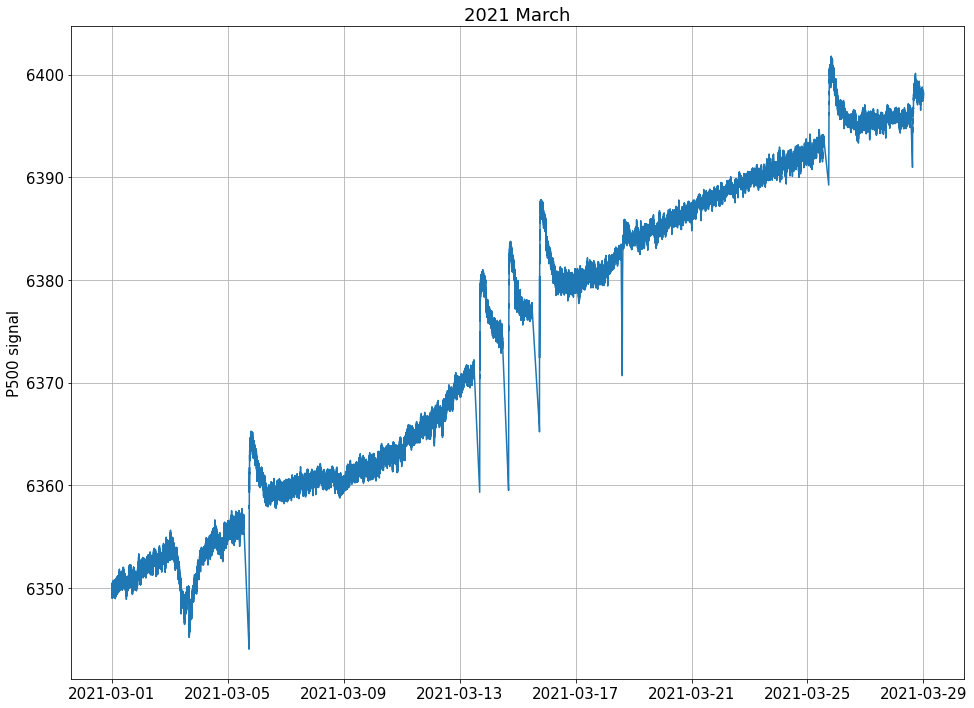

In [18]:
df['P500_time'] = pd.to_datetime(df['P500_time'])
df.set_index('P500_time', inplace=True)
ts = df['P500_signal']

plt.plot(ts)
plt.title('2021 March')
plt.ylabel('P500 signal')
plt.grid()
plt.show()

데이터의 stationarity 체크를 위한 모듈 정의

In [9]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [10]:
check_stationarity(ts)

The series is NOT stationary


In [11]:
ts_diff = ts.diff()
ts_diff.dropna(inplace=True)
check_stationarity(ts_diff)

The series is stationary


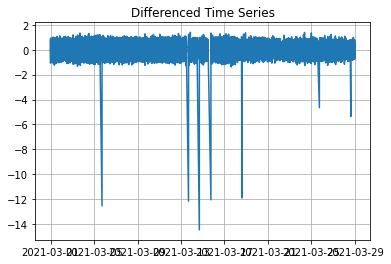

In [12]:
plt.plot(ts_diff)
plt.title('Differenced Time Series')
plt.grid()
plt.show()

시계열 데이터를 1회 미분했을 때 stationarity가 확보되며 그래프는 상기와 같음.

다음 사이트의 이상감지기법을 적용해 봄.

https://neptune.ai/blog/anomaly-detection-in-time-series

In [4]:
import statsmodels.tsa.seasonal

plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
result = statsmodels.tsa.seasonal.seasonal_decompose(ts,model='additive')
fig = result.plot()

NameError: name 'ts' is not defined

In [7]:
ts.head()


P500_time
2021-03-01 00:00:09    6349.79
2021-03-01 00:00:14    6349.78
2021-03-01 00:00:19    6349.73
2021-03-01 00:00:24    6349.71
2021-03-01 00:00:29    6349.71
Name: P500_signal, dtype: float64

In [8]:
len(ts)


306658

In [5]:
tsm = df.iloc[:,[1,2]]
tsm['P500_time'] = pd.to_datetime(tsm['P500_time'])
tsm.set_index('P500_time', inplace=True)
tsm.head()


<ipython-input-5-52d9eb451f51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsm['P500_time'] = pd.to_datetime(tsm['P500_time'])


,P500_signal
P500_time,
2021-03-01 00:00:09,6349.79
2021-03-01 00:00:14,6349.78
2021-03-01 00:00:19,6349.73
2021-03-01 00:00:24,6349.71
2021-03-01 00:00:29,6349.71


In [31]:
tsm.head()


,P500_signal
P500_time,
2021-03-01 00:00:09,6349.79
2021-03-01 00:00:14,6349.78
2021-03-01 00:00:19,6349.73
2021-03-01 00:00:24,6349.71
2021-03-01 00:00:29,6349.71


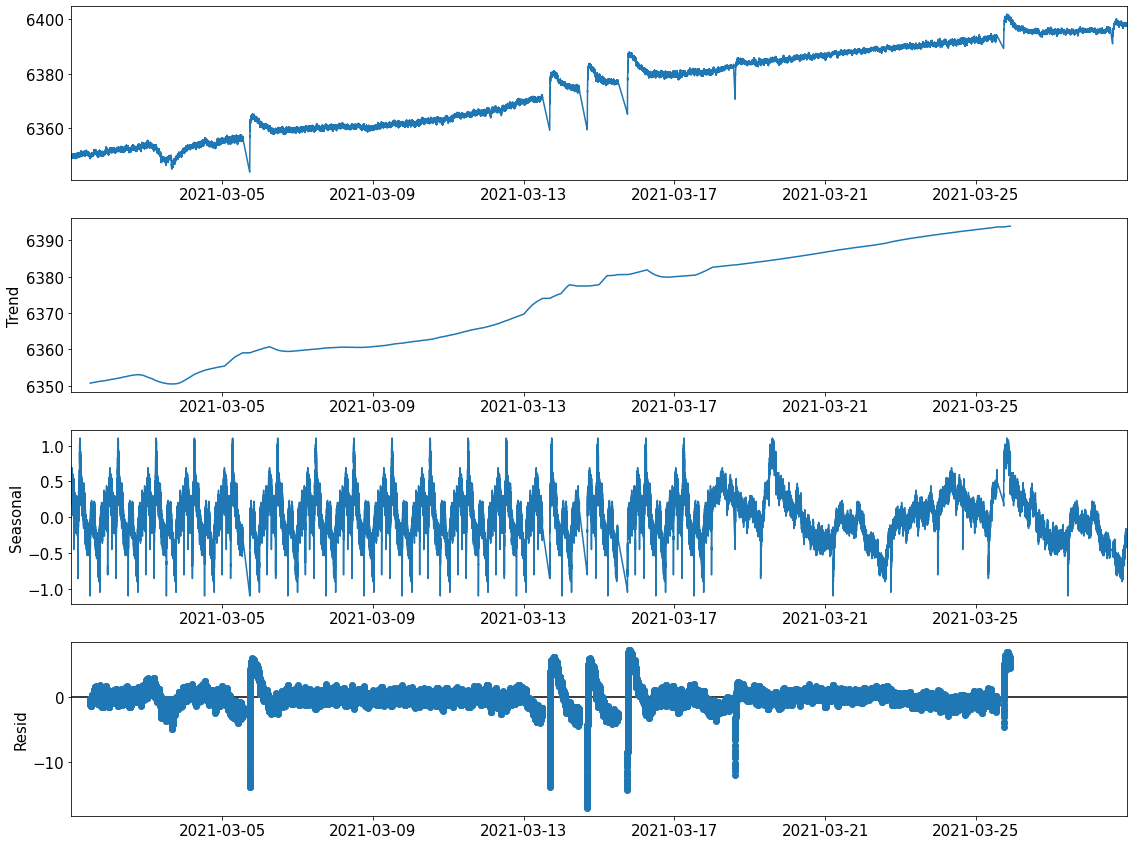

In [6]:
import statsmodels.tsa.seasonal

plt.rc('figure',figsize=(16,12))
plt.rc('font',size=15)
result = statsmodels.tsa.seasonal.seasonal_decompose(tsm, model='additive', period=17280)
fig = result.plot()

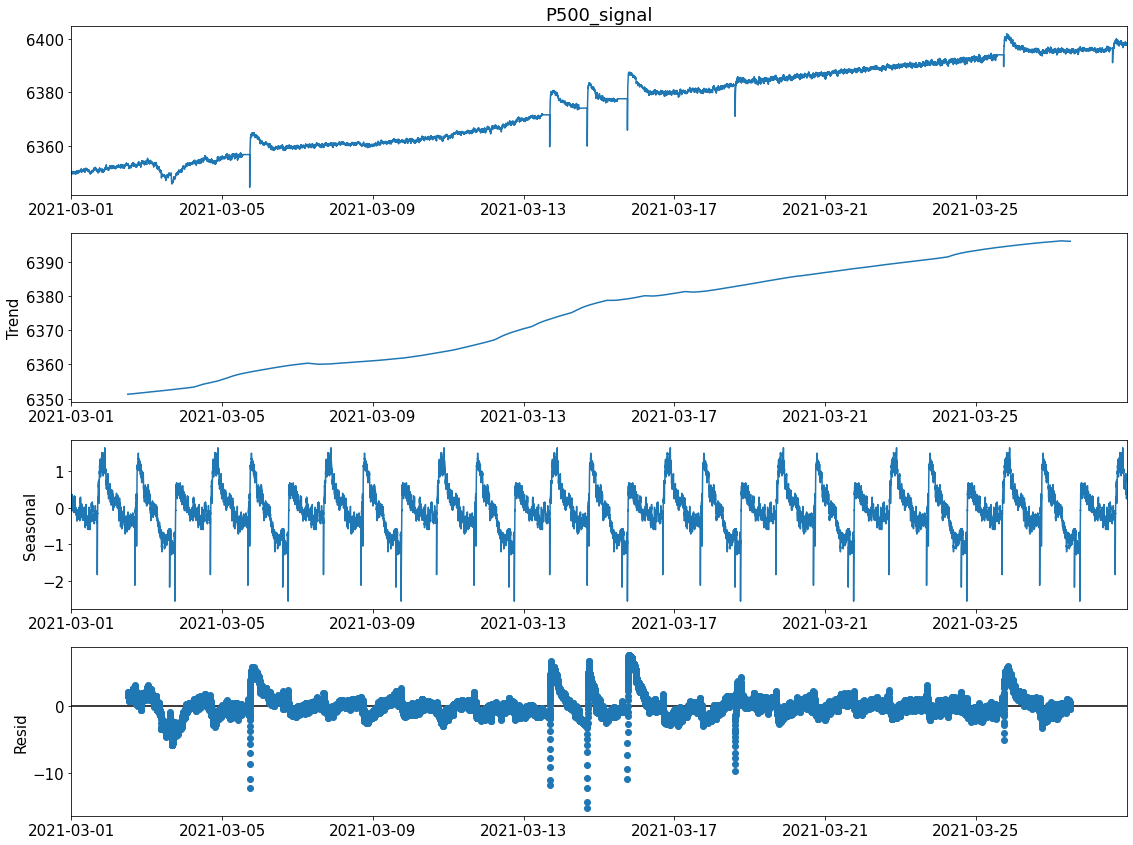

In [29]:
tsmR = tsm['P500_signal'].resample('1T').mean().ffill()
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=15)
result = statsmodels.tsa.seasonal.seasonal_decompose(tsmR, model='additive', period=1440)
fig = result.plot()



In [44]:
result.resid.sort_values()[:40]



P500_time
2021-03-14 16:31:00   -15.225643
2021-03-14 16:32:00   -14.385805
2021-03-05 17:38:00   -12.278754
2021-03-14 16:33:00   -12.236037
2021-03-13 16:36:00   -11.822116
2021-03-13 16:37:00   -10.995367
2021-03-05 17:39:00   -10.945686
2021-03-15 18:05:00   -10.833921
2021-03-14 16:34:00   -10.718630
2021-03-18 14:39:00    -9.629528
2021-03-15 18:06:00    -9.454380
2021-03-13 16:38:00    -9.123463
2021-03-14 16:35:00    -8.778749
2021-03-18 14:40:00    -8.694460
2021-03-05 17:40:00    -8.630161
2021-03-18 14:41:00    -7.737272
2021-03-13 16:39:00    -7.718321
2021-03-15 18:07:00    -7.236047
2021-03-05 17:41:00    -6.944715
2021-03-18 14:42:00    -6.939926
2021-03-14 16:36:00    -6.917991
2021-03-13 16:40:00    -6.348467
2021-03-18 14:43:00    -6.007257
2021-03-03 16:09:00    -5.848992
2021-03-03 16:13:00    -5.848567
2021-03-14 16:37:00    -5.826208
2021-03-03 16:02:00    -5.814889
2021-03-03 16:12:00    -5.798885
2021-03-03 16:08:00    -5.794340
2021-03-03 16:05:00    -5.754204
